In [ ]:
# Team : Chaitanya Muppala, Vanisa Achakulvisut, Supriya Ramarao Prasanna

In [ ]:
# We ran the code on our AWS EC2 jupyter instance we created with Sage maker.
# To run on the google colaboratory we added necessary steps but commented them out.

In [ ]:
#Installing libraries while running on EC2
#NLTK
#install nltk
%pip install nltk
#install stopword
%pip install stop-words
#Textblob
%pip install -qU  'sagemaker>=2.15.0' spacy gensim textblob emot autocorrect
#Vader
%pip install vaderSentiment

#Wordcloud
%pip install wordcloud

#Pyspark
%pip install -q findspark

#Pandas,Numpy,Matplotlib
%pip install numpy
%pip install matplotlib
%pip install pandas

#conda install -y pandas numpy matplotlib
%pip install -U pip
%pip install -U matplotlib

In [1]:
# Import the package for sagemaker and retriving data for EC2, SageMaker
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.session import s3_input, Session
import boto3
from boto3 import session
import urllib
import s3fs
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests
from io import StringIO

# Import the package
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
import numpy as np
import matplotlib as plt
import string
import re
import nltk


In [2]:
# Set bucket name and check my current region 
#bucket_name = 'ids561' #unique name for each bucket
bucket_name = 'sagemaker-studio-068254172638-c4ydipufl8'
my_region = boto3.session.Session().region_name #set region of the instance
print(my_region)

us-east-2


In [3]:
#EC2, SageMaker
url = "https://sagemaker-studio-068254172638-c4ydipufl8.s3.us-east-2.amazonaws.com/MasterData2.csv"
s=requests.get(url).content
#data = pd.read_excel(url)
data = pd.read_csv(StringIO(s.decode("latin1"))) 
data.head()
data['Date'] = pd.to_datetime(data['Date'])


In [4]:
data.head()

,ï»¿id,Text,Country,Date
0,1.386790e+18,#influencers #celebrities #contentcreators #wo...,US,2021-04-20
1,1.386790e+18,One of the biggest reasons NOT to be a Cyberba...,US,2021-04-20
2,1.386790e+18,"Now over a year into working remotely, weâve...",US,2021-04-20
3,1.386790e+18,8 U.S. Cities and Towns That Will Pay You To M...,US,2021-04-20
4,1.386790e+18,#Employment is one of the things that you canâ...,US,2021-04-20


In [5]:
# For google colab
'''
# Install JDK
from google.colab import drive
drive.mount('/content/drive')
'''


"\n# Install JDK\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [6]:
# For google colab
'''
!apt-get update
'''

'\n!apt-get update\n'

In [7]:
# For google colab
'''
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

'''

'\n!apt-get install openjdk-8-jdk-headless -qq > /dev/null\n\n'

In [8]:
# For google colab
'''
# Get Spark installer (check the path on spark.apache.org)
!wget -q http://apache.mirrors.pair.com/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

'''

'\n# Get Spark installer (check the path on spark.apache.org)\n!wget -q http://apache.mirrors.pair.com/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz\n\n'

In [9]:
# For google colab
'''
# Check path
!ls

'''

'\n# Check path\n!ls\n\n'

In [10]:
# For google colab
'''
#Untar the Spark installer
!tar -xvf spark-2.4.7-bin-hadoop2.7.tgz

'''

'\n#Untar the Spark installer\n!tar -xvf spark-2.4.7-bin-hadoop2.7.tgz\n\n'

In [11]:
# For google colab
'''
# Install findspark - a python library to find Spark
!pip install -q findspark

'''

'\n# Install findspark - a python library to find Spark\n!pip install -q findspark\n\n'

In [12]:
# For google colab
'''
# Set environment variables
# Set Java and Spark home based on the location where they are stored
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

'''

'\n# Set environment variables\n# Set Java and Spark home based on the location where they are stored\nimport os\nos.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"\nos.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"\n\n'

In [13]:
# For google colab
'''
# Create a local Spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

'''

'\n# Create a local Spark session\nimport findspark\nfindspark.init()\nfrom pyspark.sql import SparkSession\nspark = SparkSession.builder.master("local[*]").getOrCreate()\n\n'

In [14]:
# Import the package
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
import numpy as np
import matplotlib as plt
import string
import re
import nltk

# Create SparkContextz
sc = SparkContext.getOrCreate()
print("SparkContext : ", sc)

# Define spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


SparkContext :  <SparkContext master=local[*] appName=pyspark-shell>


In [16]:
# For google colab
'''
# Mount with gdrive
from google.colab import drive
drive.mount('/content/gdrive')

# Set the directory
import os
os.chdir("/content/gdrive/My Drive/IDS561/IDS561Project/CodeData")
!ls
# For google colab
'''

# For google colab
'''
data = pd.read_excel("/content/gdrive/My Drive/IDS561/IDS561Project/CodeData/MasterData2.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data.head()

#data.count()

'''

'\n# Set the directory\nimport os\nos.chdir("/content/gdrive/My Drive/IDS561/IDS561Project/CodeData")\n!ls\n# For google colab\n'

In [18]:
#creating spark dataframe

from pyspark.sql.types import StructType, StructField, DoubleType, StringType, DateType,TimestampType

schema = StructType([StructField("id", StringType(), True), StructField("Text", StringType(), True),StructField("Country", StringType(), True), StructField("Date", TimestampType(), True)])
sdf =   spark.createDataFrame(data, schema=schema)
sdf.show(10)

+----------+--------------------+-------+-------------------+
|        id|                Text|Country|               Date|
+----------+--------------------+-------+-------------------+
|1.38679E18|#influencers #cel...|     US|2021-04-20 00:00:00|
|1.38679E18|One of the bigges...|     US|2021-04-20 00:00:00|
|1.38679E18|Now over a year i...|     US|2021-04-20 00:00:00|
|1.38679E18|8 U.S. Cities and...|     US|2021-04-20 00:00:00|
|1.38679E18|#Employment is on...|     US|2021-04-20 00:00:00|
|1.38679E18|Hubstaff organize...|     US|2021-04-20 00:00:00|
|1.38678E18|Check this out FR...|     US|2021-04-20 00:00:00|
|1.38678E18|Studies show that...|     US|2021-04-20 00:00:00|
|1.38678E18|Weâre hiring! W...|     US|2021-04-20 00:00:00|
|1.38678E18|Weâre hiring! W...|     US|2021-04-20 00:00:00|
+----------+--------------------+-------+-------------------+
only showing top 10 rows



In [19]:
#Cleaning the tweets

from pyspark.sql.functions import col, lower, regexp_replace, split


def clean_text(c):
  c = lower(c)
  c = regexp_replace(c, "#workfromhome", "")
  c = regexp_replace(c, "#work", "")
  c = regexp_replace(c, "#remote", "")
  c = regexp_replace(c, "#wfh", "")
  c = regexp_replace(c, "#working", "")
  c = regexp_replace(c, "#remotework", "")
  c = regexp_replace(c, "^rt ", "")
  c = regexp_replace(c, "(https\://)\S+", "")
  c = regexp_replace(c, "@([A-Za-z0-9_]+)", "") # Remove usernames
  c = regexp_replace(c, "#([A-Za-z0-9_]+)", "") # Remove Hashtags
  c = regexp_replace(c, "[^a-zA-Z0-9\\s]", "")
  c =  regexp_replace(c, "[\n]", " ")
# c =  regexp_replace(c, "workfromhome ", "")
 # c = split(c, "\\s+") #tokenization...
  return c



In [20]:
#viewing the data 
clean_text_df = sdf.select( "id", clean_text(col("Text")).alias("tweet"), "Country", "Date")
clean_text_df.show(20, truncate=False)

clean_text_df.count()

+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+-------------------+
|id        |tweet                                                                                                                                                                                                                                  |Country|Date               |
+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+-------------------+
|1.38679E18|      check my website for my top recommended  sites                                                                                                                     

40645

In [21]:
from pyspark.sql.functions import substring
clean_text_df = clean_text_df.withColumn('Date', substring('Date',1,10))
clean_text_df.show(20)

+----------+--------------------+-------+----------+
|        id|               tweet|Country|      Date|
+----------+--------------------+-------+----------+
|1.38679E18|      check my we...|     US|2021-04-20|
|1.38679E18|one of the bigges...|     US|2021-04-20|
|1.38679E18|now over a year i...|     US|2021-04-20|
|1.38679E18|8 us cities and t...|     US|2021-04-20|
|1.38679E18| is one of the th...|     US|2021-04-20|
|1.38679E18|hubstaff organize...|     US|2021-04-20|
|1.38678E18|check this out fr...|     US|2021-04-20|
|1.38678E18|studies show that...|     US|2021-04-20|
|1.38678E18|were hiring we ar...|     US|2021-04-20|
|1.38678E18|were hiring we ar...|     US|2021-04-20|
|1.38678E18|happy   and stay ...|     US|2021-04-20|
|1.38678E18|  and  has change...|     US|2021-04-20|
|1.38678E18|15 top ways to ma...|     US|2021-04-20|
|1.38678E18|grow your experti...|     US|2021-04-20|
|1.38678E18|tips amp tricks f...|     US|2021-04-20|
|1.38678E18|enhancing your wo...|     US|2021-

In [22]:
#Removing Duplicates
clean_text_df1 = clean_text_df.drop_duplicates(subset = ['id','tweet','Date','Country'])
clean_text_df1.count()

25390

In [25]:
# sample how textblob works
from textblob import TextBlob
testimonial = TextBlob("not great")
testimonial.sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [26]:
from textblob import TextBlob

#Textblob Algorithm
def get_sentiment(text):
  testimonial = TextBlob(text)
  return testimonial.sentiment   


In [27]:
# Get sentiment from tweet
from pyspark.sql.functions import udf

sentimentvalue = udf(lambda x: TextBlob(x).sentiment[0])
subjectivity = udf(lambda x: TextBlob(x).sentiment[1])
sendf = clean_text_df1.withColumn("polarity", sentimentvalue("tweet").cast("double"))\
                      .withColumn("subjectivity",  subjectivity("tweet").cast("double"))
sendf.show(20)

+--------------------+--------------------+-------+----------+--------------------+-------------------+
|                  id|               tweet|Country|      Date|            polarity|       subjectivity|
+--------------------+--------------------+-------+----------+--------------------+-------------------+
|          1.38678E18|studies show that...|     US|2021-04-20|                 0.0|                0.0|
|          1.38678E18|15 top ways to ma...|     US|2021-04-20|                0.25|               0.25|
|          1.38671E18|check this out fr...|     US|2021-04-20|                 0.4|                0.8|
|          1.38667E18|learn about what ...|     US|2021-04-20|                 0.4|                0.5|
|           1.3863E18| when youre ingfr...|     US|2021-04-22|                0.65| 0.9444444444444444|
|          1.38672E18| hey remote worke...|     US|2021-04-23|                -0.1|                0.2|
|          1.38663E18|mortgage lenders ...|     US|2021-04-23|0.

In [28]:
sendf.dtypes

[('id', 'string'),
 ('tweet', 'string'),
 ('Country', 'string'),
 ('Date', 'string'),
 ('polarity', 'double'),
 ('subjectivity', 'double')]

In [29]:
#defining sentiment logic
def categorysentiment(x):
    if x < 0:
      sentiment = "negative"
    elif x == 0:
        sentiment = "neutral"
    else:
        sentiment = "positive"
    return sentiment

In [30]:
sentiment_udf = udf(categorysentiment, StringType())
sendf1 = sendf.withColumn("sentiment", sentiment_udf("polarity"))

In [31]:
sendf1.show(10)

+--------------------+--------------------+-------+----------+--------------------+-------------------+---------+
|                  id|               tweet|Country|      Date|            polarity|       subjectivity|sentiment|
+--------------------+--------------------+-------+----------+--------------------+-------------------+---------+
|          1.38678E18|studies show that...|     US|2021-04-20|                 0.0|                0.0|  neutral|
|          1.38678E18|15 top ways to ma...|     US|2021-04-20|                0.25|               0.25| positive|
|          1.38671E18|check this out fr...|     US|2021-04-20|                 0.4|                0.8| positive|
|          1.38667E18|learn about what ...|     US|2021-04-20|                 0.4|                0.5| positive|
|           1.3863E18| when youre ingfr...|     US|2021-04-22|                0.65| 0.9444444444444444| positive|
|          1.38672E18| hey remote worke...|     US|2021-04-23|                -0.1|     

In [32]:
neg10 = sendf1.filter(sendf1.polarity == -1)\
       .select('id','tweet')\
        .take(10)

In [33]:
neg10

[Row(id='1.38925636251809792E18', tweet='working from home is getting boring now'),
 Row(id='1.38559787790532992E18', tweet='something tells me commute to office is getting closer no its not the traffic my morning coffee tasted like the horrible coffee you get in office byebye '),
 Row(id='1.38675E18', tweet='youre fired those are some of the worst words you can ever hear from your employer what do you do if youre fired from your work at home job  work '),
 Row(id='1.38706653999262106E18', tweet='who said  is boring '),
 Row(id='1.39E18', tweet='andrea got 5 shots and then had to get blood drawn shes having the worst day '),
 Row(id='1.38539183109401805E18', tweet='omg  that was hysterical and so spot on      '),
 Row(id='1.38753762378324787E18', tweet='the truth about working from home in 24 shocking charts   via  work  '),
 Row(id='1.38539183109401805E18', tweet='omg  that was hysterical and so spot on      '),
 Row(id='1.38679E18', tweet=' you guys are a terrible company you charge 

In [34]:
# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

# Convert the Spark DataFrame back to a Pandas DataFrame using Arrow
sendf2 = sendf1.select("*").toPandas()

#Loading results to csv
#sendf2.to_csv('/content/gdrive/My Drive/IDS561/IDS561Project/Results/Textblobfinal.csv', index = False, header=True)

In [35]:
#Creating three dataframes containing positive, negative, neutral tweets from final results dataframe
# Will use these dataframes to generate words and how many times they are used in positive, negative, neutal tweets to create wordclouds

tweets_df_pos = pd.DataFrame(sendf2['tweet'][sendf2['sentiment']=='positive'])
tweets_df_neg = pd.DataFrame(sendf2['tweet'][sendf2['sentiment']=='negative'])
tweets_df_neu = pd.DataFrame(sendf2['tweet'][sendf2['sentiment']=='neutral'])

In [36]:
#Importing packages for reports

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import string
%matplotlib inline

+---------+-----+
|sentiment|count|
+---------+-----+
| positive|13586|
|  neutral| 7471|
| negative| 4333|
+---------+-----+



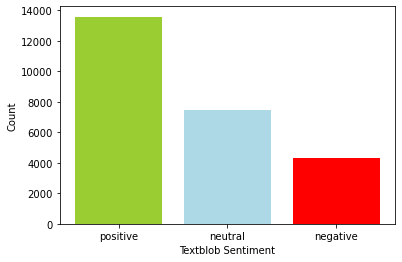

In [37]:
# Distribution of sentiment of the tweets 

df_plot = sendf1.groupBy("sentiment").count()
df_plot.show(5)

x = df_plot.toPandas()["sentiment"].values.tolist()
y = df_plot.toPandas()["count"].values.tolist()

plt.bar(x,y, color =['yellowgreen', 'lightblue', 'red'])
plt.xlabel("Textblob Sentiment")
plt.ylabel("Count")
plt.show()

In [38]:
#To create wordcloud with high frequency words in the tweets

def wordcloudreport(dfx, title):
  wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, background_color='white',)
  wordcloud.generate(str(set(dfx['tweet'])))
  # declare our figure 
  plt.figure(figsize=(20,10))
  plt.title(title, fontsize=20,color='Red')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.tight_layout(pad=10)
  plt.show()

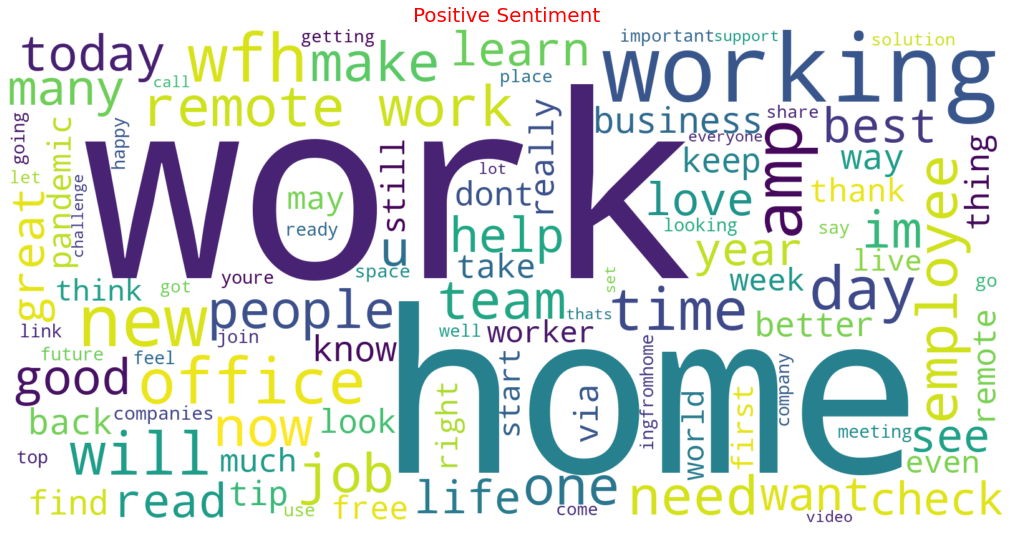

In [39]:
#2
wordcloudreport(tweets_df_pos, "Positive Sentiment")

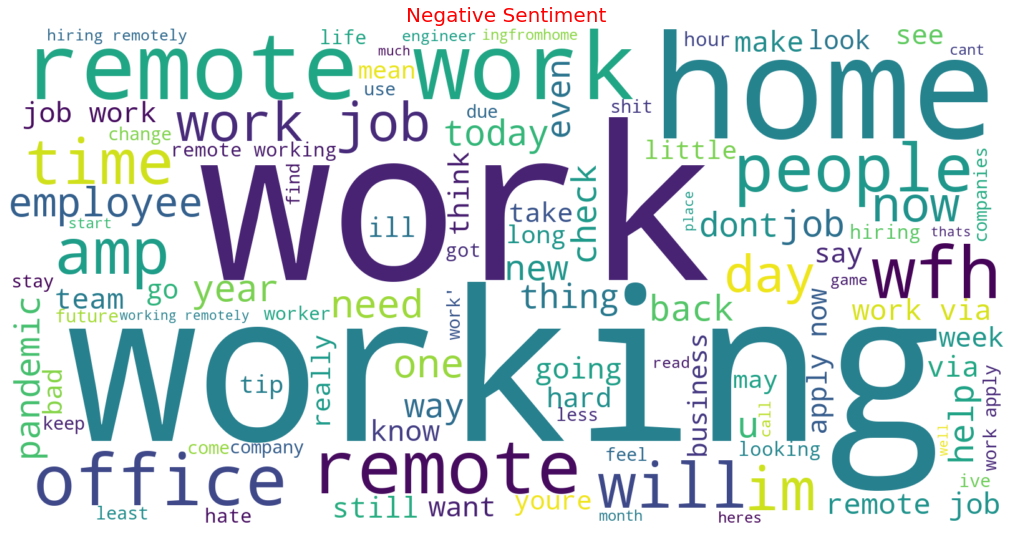

In [40]:
wordcloudreport(tweets_df_neg, "Negative Sentiment")

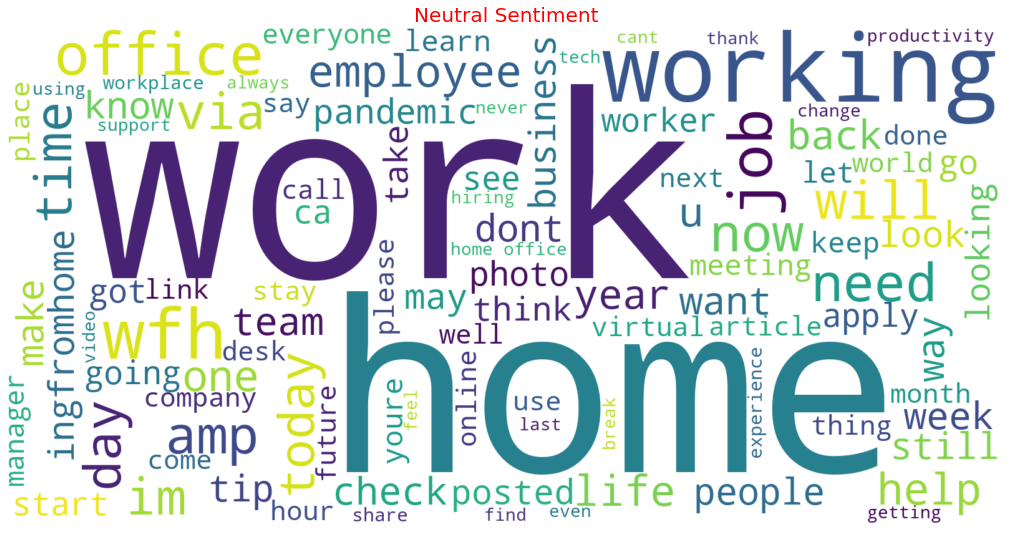

In [41]:
wordcloudreport(tweets_df_neu, "Neutral Sentiment")

In [42]:
#Algorithm Vader
#import vaderSentiment
#https://github.com/sanjames/NLP/blob/master/Social%20Media%20Analysis.ipynb
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [43]:
#Vader Algorithm
def print_sentiment_scores(tweets):
    vadersenti = analyser.polarity_scores(tweets)
    return pd.Series([vadersenti['pos'], vadersenti['neg'], vadersenti['neu'], vadersenti['compound']])

In [44]:
#Calling the algorithm

sendf2[['vadersenti_pos', 'vadersenti_neg', 'vadersenti_neu', 'vadersenti_compound']]  = sendf2['tweet'].apply(print_sentiment_scores)

In [45]:
sendf2[['tweet', 'sentiment', 'vadersenti_pos','vadersenti_neg', 'vadersenti_neu','vadersenti_compound']].head(10)

,tweet,sentiment,vadersenti_pos,vadersenti_neg,vadersenti_neu,vadersenti_compound
0,studies show that has increased productivity ...,neutral,0.087,0.000,0.913,0.2732
1,15 top ways to make money with digital marketi...,positive,0.114,0.000,0.886,0.2023
2,check this out free make 750 today athome,positive,0.320,0.000,0.680,0.5106
3,learn about what you can enjoy as an at,positive,0.286,0.000,0.714,0.4939
4,when youre ingfromhome in sometimes means th...,positive,0.251,0.000,0.749,0.8271
5,hey remote workers cameras on or cameras off ...,negative,0.000,0.000,1.000,0.0000
6,mortgage lenders say remote work cut costs hin...,positive,0.000,0.116,0.884,-0.2732
7,a nice video related to free make 700 in minut...,positive,0.404,0.000,0.596,0.7269
8,leaders must help employees thrive while worki...,neutral,0.252,0.000,0.748,0.4019
9,successfully working from home is a skill just...,positive,0.274,0.000,0.726,0.8074


In [46]:
#defining sentiment logic

sendf2.loc[sendf2['vadersenti_compound'] > 0.05 , 'vader_senti'] = 'positive'
sendf2.loc[sendf2['vadersenti_compound'] < -0.05 , 'vader_senti'] = 'negative'
sendf2.loc[(sendf2['vadersenti_compound'] <=0.05) & (sendf2['vadersenti_compound'] >=-0.05) , 'vader_senti'] = 'neutral'

#sendf2[['tweet', 'vadersenti_pos','vadersenti_neg', 'vadersenti_neu','vadersenti_compound', 'vader_senti']].head(10)


Text(0, 0.5, 'Count')

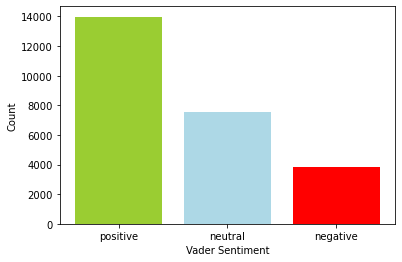

In [47]:
# Distribution of sentiment of the tweets 

counts = sendf2.vader_senti.value_counts(normalize=False) 

x=counts.index
y=counts

plt.bar(x, y, color =['yellowgreen', 'lightblue', 'red'])
plt.xlabel("Vader Sentiment")
plt.ylabel("Count")


In [48]:
#Count of Positive, negative, neutral tweets
print(sendf2.vader_senti.value_counts())

positive    13980
neutral      7574
negative     3836
Name: vader_senti, dtype: int64


In [49]:
#Creating three dataframes containing positive, negative, neutral tweets from final results dataframe
# Will use these dataframes to generate words and how many times they are used in positive, negative, neutal tweets to create wordclouds

vader_df_pos = pd.DataFrame(sendf2['tweet'][sendf2['vader_senti']=='positive'])
vader_df_neg = pd.DataFrame(sendf2['tweet'][sendf2['vader_senti']=='negative'])
vader_df_neu = pd.DataFrame(sendf2['tweet'][sendf2['vader_senti']=='neutral'])

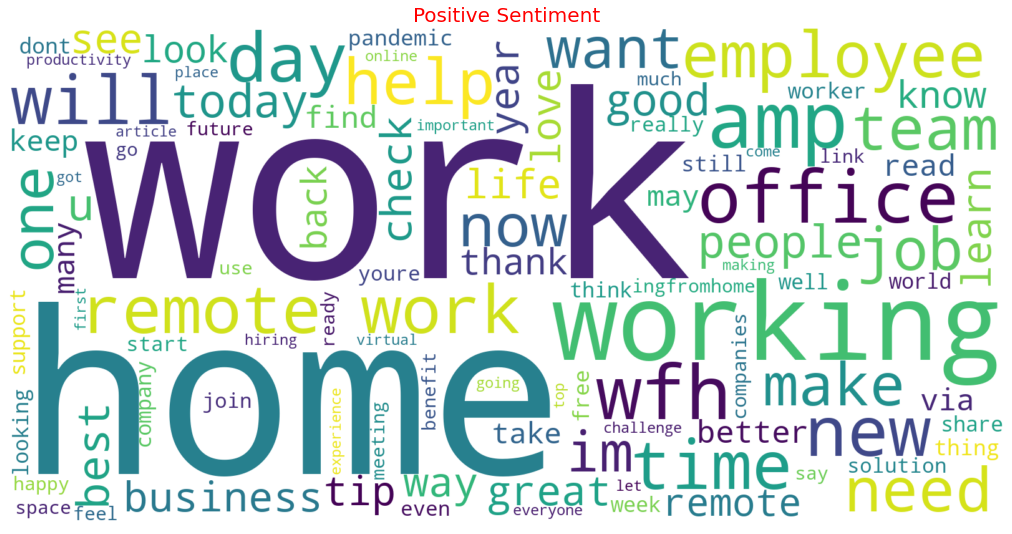

In [50]:
wordcloudreport(vader_df_pos, "Positive Sentiment")

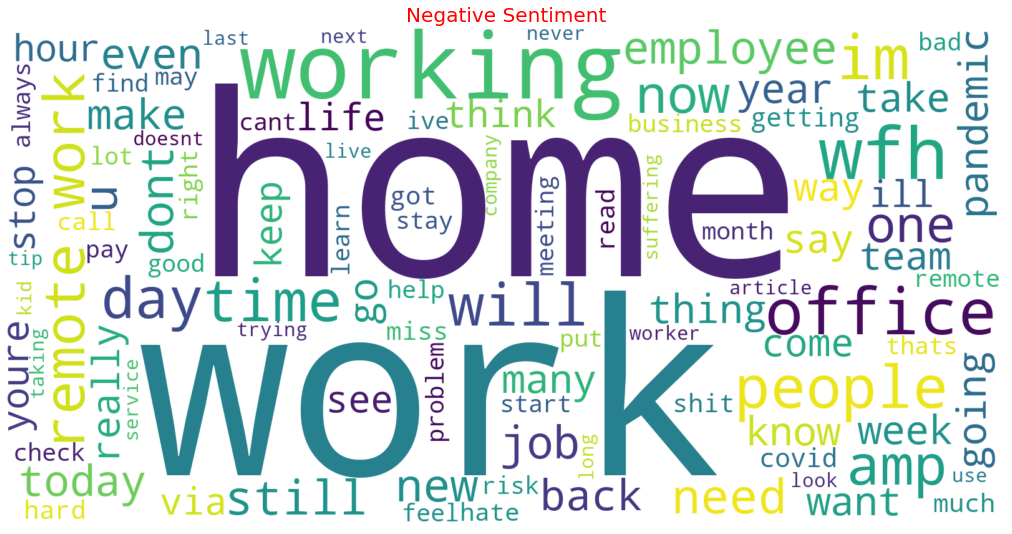

In [51]:
wordcloudreport(vader_df_neg, "Negative Sentiment")

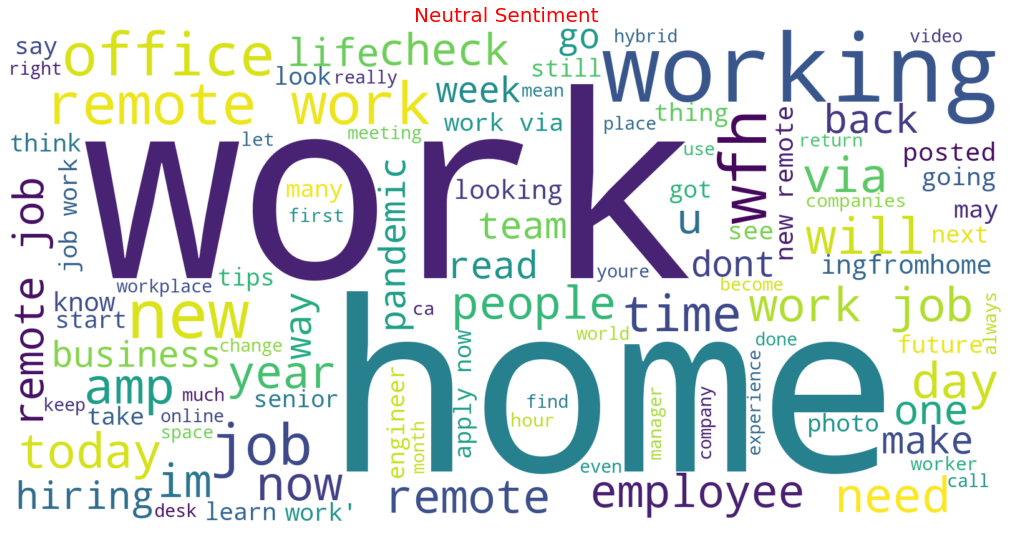

In [52]:
wordcloudreport(vader_df_neu, "Neutral Sentiment")

In [53]:
print("Positive Tweets:\n")
print(list(sendf2[sendf2['vader_senti'] == 'positive'].tweet)[:5])

print("\nNegative Tweets:\n")
print(list(sendf2[sendf2['vader_senti'] == 'negative'].tweet)[:5])

print("\nNeutral Tweets:\n")
print(list(sendf2[sendf2['vader_senti'] == 'neutral'].tweet)[:5])

Positive Tweets:

['studies show that  has increased productivity by 5 and 1 in 5 executives expect to reduce their  space in the coming year  work ', '15 top ways to make money with digital marketing  click here to see the post     ', 'check this out free make 750 today  athome     ', 'learn about what you can enjoy as an  at     ', ' when youre ingfromhome in  sometimes means that you have to have a parasol on your patio because you dont have an umbrella is this how we  sure definitely happy       ']

Negative Tweets:

['mortgage lenders say remote work cut costs hint at new office model  national mortgage news work via    ', 'huge win for  tech scene but a loss for work initiatives  cant win em all   picks triangle for new 1b campus thousands of jobs paying 187000 minimum      ', 'lack of commute means big savings for teleworkers   work teams ', 'this is heartbreaking to see ', ' theyre like matte black amp they look weakie lol theyre at home but ill shoot a pic when i get home padr

In [ ]:
#Converting results into csv file to load into tableau
#sendf2.to_csv('/content/gdrive/My Drive/IDS561/IDS561Project/Results/Vaderfinal.csv', index = False, header=True)